Importando las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats




Leyendo el dataset

In [2]:
df=pd.read_csv("online_retail.csv",on_bad_lines='skip', encoding='unicode_escape' ,delimiter=";")

In [3]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Explorando valores únicos y conteo de las columnas y las filas

In [4]:
df['InvoiceNo'].describe()


count     541909
unique     25900
top       573585
freq        1114
Name: InvoiceNo, dtype: object

In [5]:
df['StockCode'].describe()

count     541909
unique      4070
top       85123A
freq        2313
Name: StockCode, dtype: object

In [6]:
df['Description'].describe()

count                                 540455
unique                                  4223
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    2369
Name: Description, dtype: object

In [7]:
df['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [8]:
df['InvoiceDate'].describe()

count               541909
unique               23260
top       31/10/2011 14:41
freq                  1114
Name: InvoiceDate, dtype: object

In [9]:
df['UnitPrice'].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [10]:
df['CustomerID'].describe()

count    406829.000000
mean      15287.690570
std        1713.600303
min       12346.000000
25%       13953.000000
50%       15152.000000
75%       16791.000000
max       18287.000000
Name: CustomerID, dtype: float64

In [11]:
df['Country'].describe()

count             541909
unique                38
top       United Kingdom
freq              495478
Name: Country, dtype: object

Mostrando el dataset

In [12]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,1/12/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,1/12/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,1/12/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,1/12/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1/12/2010 8:34,1.69,13047.0,United Kingdom


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Revisando la columna Country para ver si hay datos erroneos

In [14]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

Observando los paises y los registros provenientes de dichos paises, se observa que la mayoria de los registros de ventas retail en el dataset provienen del Reino Unido

In [15]:
df['Country'].value_counts()/df['Country'].value_counts().sum()*100

Country
United Kingdom          91.431956
Germany                  1.752139
France                   1.579047
EIRE                     1.512431
Spain                    0.467422
Netherlands              0.437527
Belgium                  0.381798
Switzerland              0.369435
Portugal                 0.280305
Australia                0.232327
Norway                   0.200403
Italy                    0.148180
Channel Islands          0.139876
Finland                  0.128250
Cyprus                   0.114779
Sweden                   0.085254
Unspecified              0.082302
Austria                  0.073998
Denmark                  0.071783
Japan                    0.066063
Poland                   0.062926
Israel                   0.054806
USA                      0.053699
Hong Kong                0.053145
Singapore                0.042258
Iceland                  0.033585
Canada                   0.027864
Greece                   0.026942
Malta                    0.023436
United

Transformando la columna InvoiceDate que esta en tipo object a tipo datetime para trabajar con series de tiempo

In [16]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y %H:%M')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Observando la columna customerID: hay 135080 registros nulos en la columna CustomerID, es decir, registros de los que se desconoce el cliente que ejecuto la transaccion registrada Y 4372 valores unicos para la columna CustomerId lo que significa que esta es la cantidad de  clientes distintos  contenida en el dataset cuyos id se conocen.

In [18]:
df['CustomerID'].isnull().sum()

135080

In [19]:
df['CustomerID'].nunique()

4372

Describiendo las columnas numericas relevantes del dataset:  UnitPrice y Quantity para ver como se comportan los precios y las cantidades de las ventas registradas en el dataset, observamos que hay valores negativos en cantidades y precios por lo cual no tendremos en cuenta las transacciones que tienen valores negativos en estas dos columnas dado que en terminos de negocio asumiremos que no tiene sentido tener en cuenta estos registros.

In [20]:
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


Filtrando el data set con las consideraciones anteriores. data cleaning, se han limpiado registros que contienen datos cuantitativos que podrian afectar nuestro analisis dado su contenido carente de sentido, en este caso valores de cantidades y precios negativas.

In [21]:
df = df[(df['Quantity'] > 0)] 
df=df[(df['UnitPrice'] > 0)]

In [22]:
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,530104.000000,530104.000000
mean,10.542037,3.907625
std,155.524124,35.915681
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


Despues de limpiar estos registros observamos que la unica columna que contiene registros nulos en este punt es la columna CustomerID. No queremos perder datos eliminando los registros de esta columna dado que si queremos hacer pronosticos con series de tiempo para la variable precio esta informacion podria ser valiosa  y podriamos hacer pronosticos sin necesidad de tener los datos de la columna customer id. Ademas, usando esta columna podemos saber los clientes que mas compran y mas ingresos generan al ecomerce.

Observando el comportamiento de las variables UnitPrice y Quantity vemos que existe una amplia diferencia entre los valores maximos encontrados en cada columna y los valores encontrados en los percentiles 25% , 50% y 75%, eto indica que pueden haber outliers que afecten el analisis, por lo cual deberemos darle tratamiento a estos datos.
Procedemos a filtrar la vase de datos eliminando los valores atipicos mediante el metodo del calculo del zscore para excluir las observaciones que se alejan 3 desviaciones standar o mas de la media. de los datos

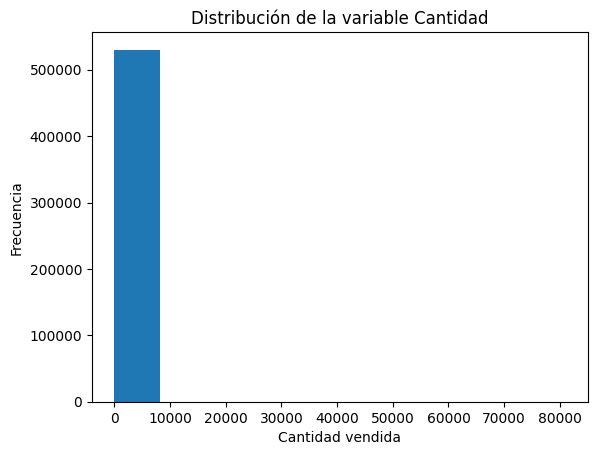

In [23]:
plt.hist(df['Quantity'], bins=10) 
plt.xlabel('Cantidad vendida')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable Cantidad')
plt.show()

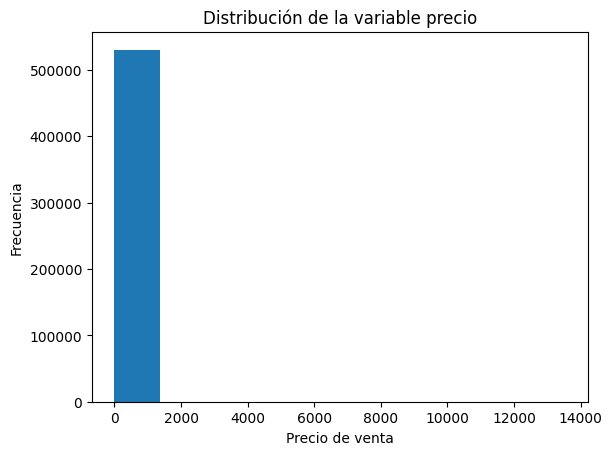

In [24]:
plt.hist(df['UnitPrice'], bins=10) 
plt.xlabel('Precio de venta')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable precio')
plt.show()

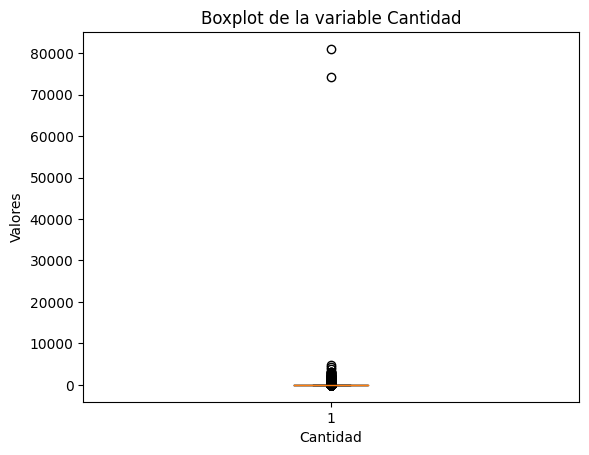

In [25]:
plt.boxplot(df['Quantity'])
plt.xlabel('Cantidad')
plt.ylabel('Valores')
plt.title('Boxplot de la variable Cantidad')
plt.show()


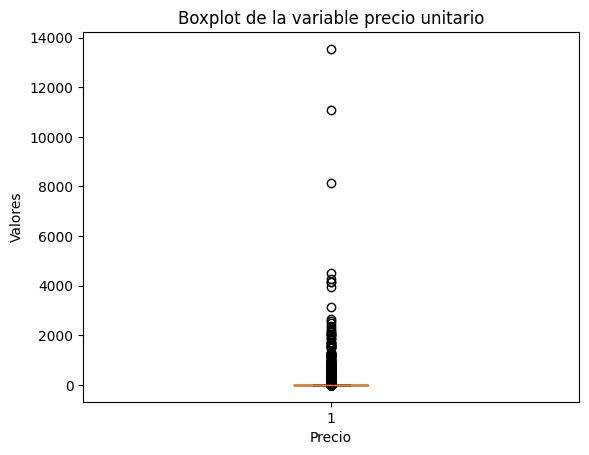

In [26]:
plt.boxplot(df['UnitPrice'])
plt.xlabel('Precio')
plt.ylabel('Valores')
plt.title('Boxplot de la variable precio unitario')
plt.show()

Usando la tecnica sencilla de rango intercuartilico para filtrar el dataframe eliminando valores que se encuentran por encima de los limites superior e inferior para las variables Quantity y unit price

In [27]:

Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)

IQR = Q3 - Q1


lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df= df[(df['Quantity'] >= lower_limit) & (df['Quantity'] <= upper_limit)]






In [28]:
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,473741.000000,473741.000000
mean,4.716636,4.216455
std,4.441115,37.965381
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.460000
75%,6.000000,4.150000
max,23.000000,13541.330000


In [29]:
Q12 = df['UnitPrice'].quantile(0.25)
Q32 = df['UnitPrice'].quantile(0.75)

IQR2 = Q32 - Q12


lower_limit2 = Q12 - 1.5 * IQR2
upper_limit2 = Q32 + 1.5 * IQR2

df= df[(df['UnitPrice'] >= lower_limit2) & (df['UnitPrice'] <= upper_limit2)]


Observamos de nuevo la distribución de los datos Quantity y UnitPrice para ver su comportamiento despues de filtrar la base con la tecnica de deteccion de outliers mencionada

In [30]:
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,442666.000000,442666.000000
mean,4.904070,2.784289
std,4.495069,2.036175
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,8.000000,3.750000
max,23.000000,8.500000


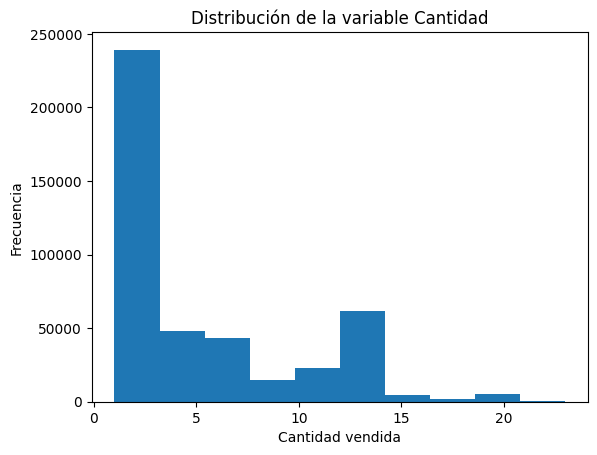

In [31]:
plt.hist(df['Quantity'], bins=10) 
plt.xlabel('Cantidad vendida')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable Cantidad')
plt.show()

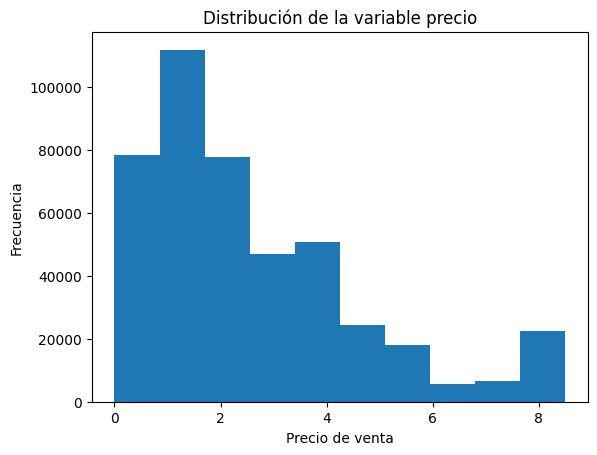

In [32]:
plt.hist(df['UnitPrice'], bins=10)  
plt.xlabel('Precio de venta')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable precio')
plt.show()

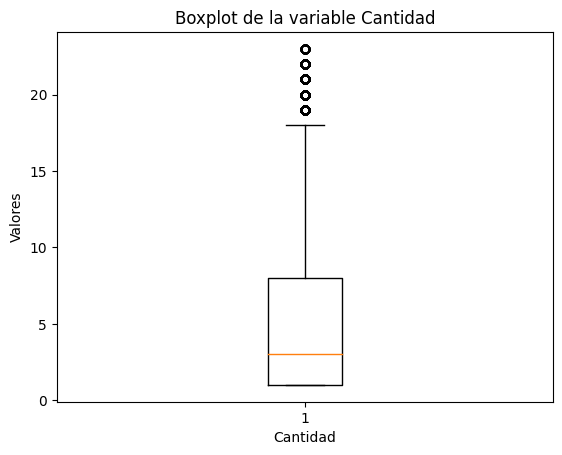

In [33]:
plt.boxplot(df['Quantity'])
plt.xlabel('Cantidad')
plt.ylabel('Valores')
plt.title('Boxplot de la variable Cantidad')
plt.show()

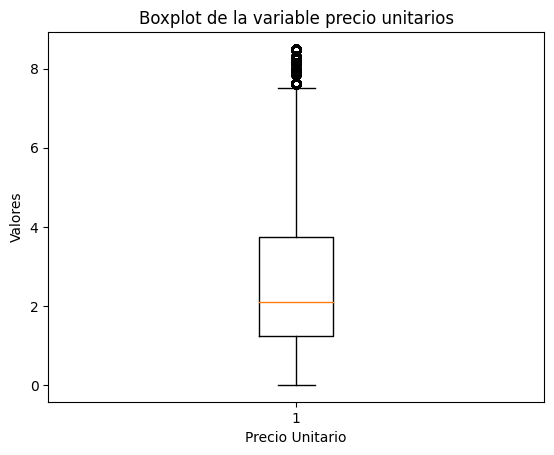

In [34]:
plt.boxplot(df['UnitPrice'])
plt.xlabel('Precio Unitario')
plt.ylabel('Valores')
plt.title('Boxplot de la variable precio unitarios')
plt.show()

Despues de eliminar los valores atipicos en las columnas numericas tenemos un dataset con 442666 observaciones.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442666 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    442666 non-null  object        
 1   StockCode    442666 non-null  object        
 2   Description  442666 non-null  object        
 3   Quantity     442666 non-null  int64         
 4   InvoiceDate  442666 non-null  datetime64[ns]
 5   UnitPrice    442666 non-null  float64       
 6   CustomerID   326440 non-null  float64       
 7   Country      442666 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 30.4+ MB


In [36]:
cantidad_vendida_por_pais = df.dropna().groupby('Country')['Quantity'].sum()



In [37]:
cantidad_vendida_por_pais.sort_values(ascending=False)

Country
United Kingdom          1623313
Germany                   61030
France                    54507
EIRE                      41727
Belgium                   13520
Spain                     13034
Switzerland               11570
Portugal                   9493
Norway                     5975
Italy                      5064
Channel Islands            4401
Finland                    4169
Netherlands                4157
Australia                  3641
Cyprus                     2986
Austria                    2825
Denmark                    2211
Poland                     2191
Sweden                     1885
Singapore                  1318
Iceland                    1281
USA                        1195
Israel                     1122
Greece                     1087
Canada                      962
Unspecified                 792
Malta                       631
United Arab Emirates        492
Japan                       422
European Community          339
RSA                         336


Observamos que en terminos de cantidad de unidades vendidas, el principal pais donde se compra es el Reino Unido a donde se vendieron 1.623.313 unidades. 

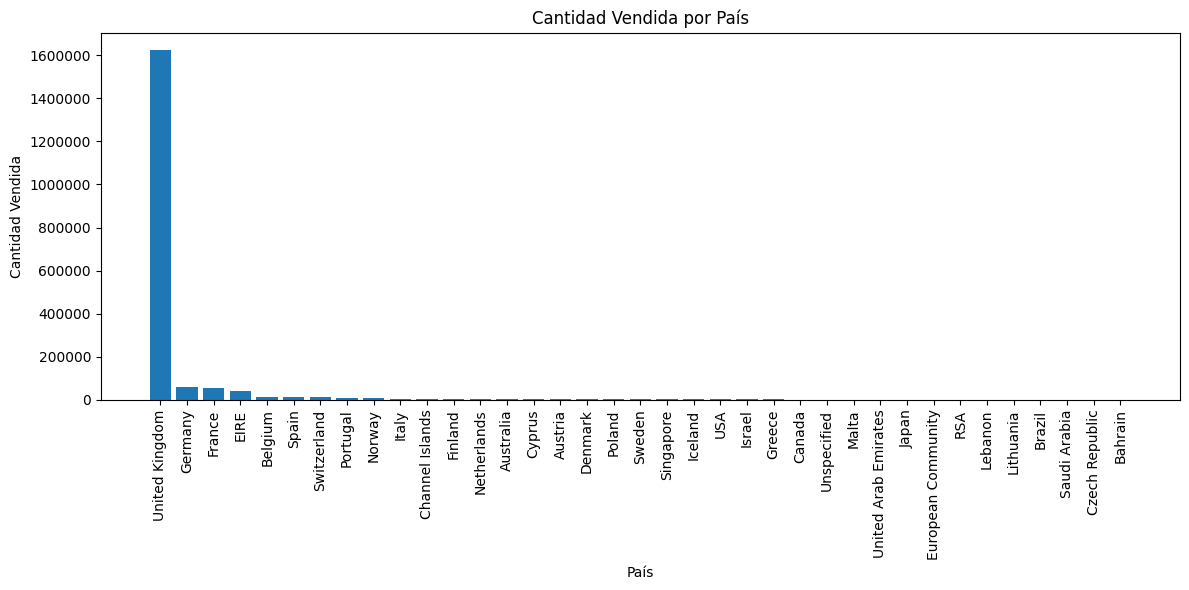

In [38]:
df_cantidad_vendida_por_pais = cantidad_vendida_por_pais.reset_index()

df_cantidad_vendida_por_pais.columns = ['Country', 'TotalQuantitySold']

df_cantidad_vendida_por_pais = df_cantidad_vendida_por_pais.sort_values(by='TotalQuantitySold', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_cantidad_vendida_por_pais['Country'], df_cantidad_vendida_por_pais['TotalQuantitySold'])
plt.xlabel('País')
plt.ylabel('Cantidad Vendida')
plt.title('Cantidad Vendida por País')
plt.xticks(rotation=90)  
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout() 
plt.show()





A continuación estudiaremos por separado los demas paises distintos al Reino Unido que agrupan una minoria de ventas.
Dividiremos los paises en tres grupos:

Primer grupo: Paises con cantidad de unidades vendidas entre [0 , 10.000]

Segundo grupo: Paises con cantidad de unidades vendidas entre [10.000, 100.000]

Tercer grupo: Paises con mas de 100.000 unidades vendidas (Unicamente el reino unido cae en este grupo, de manera que los grupos relevantes seran los dos primeros)


In [39]:
df_cantidad_vendida_por_pais = cantidad_vendida_por_pais.reset_index()

df_cantidad_vendida_por_pais.columns = ['Country', 'TotalQuantitySold']

In [40]:
df_cantidad_vendida_por_pais.sort_values(ascending=False, by='TotalQuantitySold')

,Country,TotalQuantitySold
35,United Kingdom,1623313
14,Germany,61030
13,France,54507
10,EIRE,41727
3,Belgium,13520
30,Spain,13034
32,Switzerland,11570
26,Portugal,9493
24,Norway,5975
18,Italy,5064


In [41]:
df_paises_primergrupo = df_cantidad_vendida_por_pais[(df_cantidad_vendida_por_pais['TotalQuantitySold'] >= 0) & (df_cantidad_vendida_por_pais['TotalQuantitySold'] <= 10000)]


In [42]:
df_paises_segundogrupo = df_cantidad_vendida_por_pais[(df_cantidad_vendida_por_pais['TotalQuantitySold'] >= 10000) & (df_cantidad_vendida_por_pais['TotalQuantitySold'] <= 100000)]


In [43]:
df_paises_tercergrupo = df_cantidad_vendida_por_pais[(df_cantidad_vendida_por_pais['TotalQuantitySold']>= 100000)]


In [44]:
df_paises_primergrupo

,Country,TotalQuantitySold
0,Australia,3641
1,Austria,2825
2,Bahrain,70
4,Brazil,148
5,Canada,962
6,Channel Islands,4401
7,Cyprus,2986
8,Czech Republic,74
9,Denmark,2211
11,European Community,339


In [45]:
df_paises_segundogrupo

,Country,TotalQuantitySold
3,Belgium,13520
10,EIRE,41727
13,France,54507
14,Germany,61030
30,Spain,13034
32,Switzerland,11570


In [46]:
df_paises_tercergrupo

,Country,TotalQuantitySold
35,United Kingdom,1623313


Graficando las cantidades vendidas separadas en los distintos grupos de interés

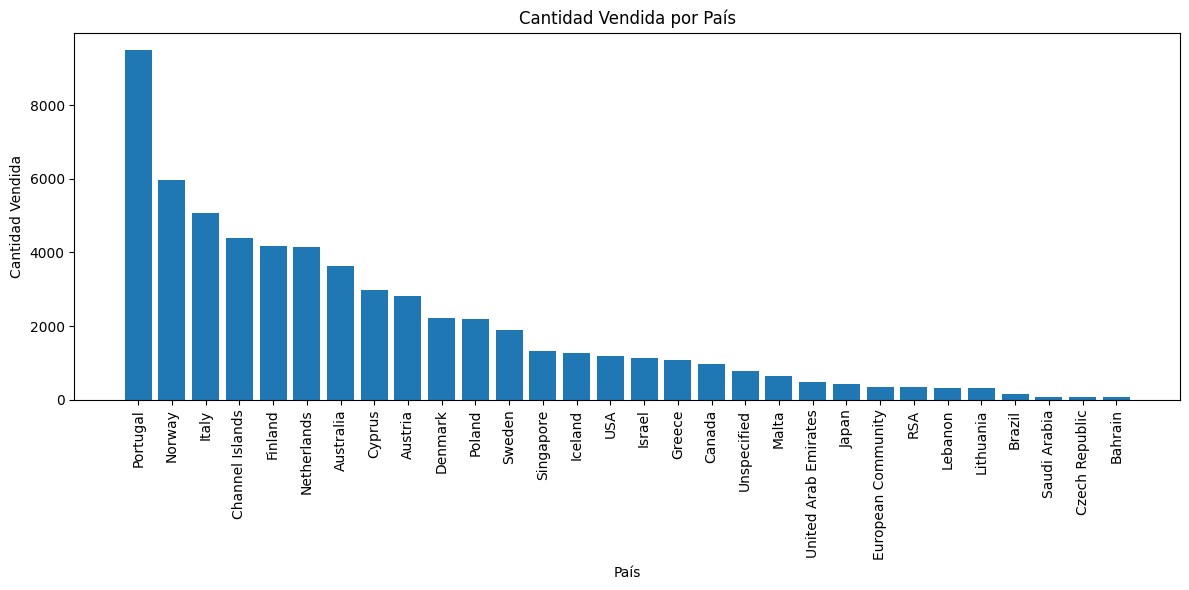

In [47]:
df_paises_primergrupo= df_paises_primergrupo.sort_values(by='TotalQuantitySold', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_paises_primergrupo['Country'], df_paises_primergrupo['TotalQuantitySold'])
plt.xlabel('País')
plt.ylabel('Cantidad Vendida')
plt.title('Cantidad Vendida por País')
plt.xticks(rotation=90)  
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout() 
plt.show()



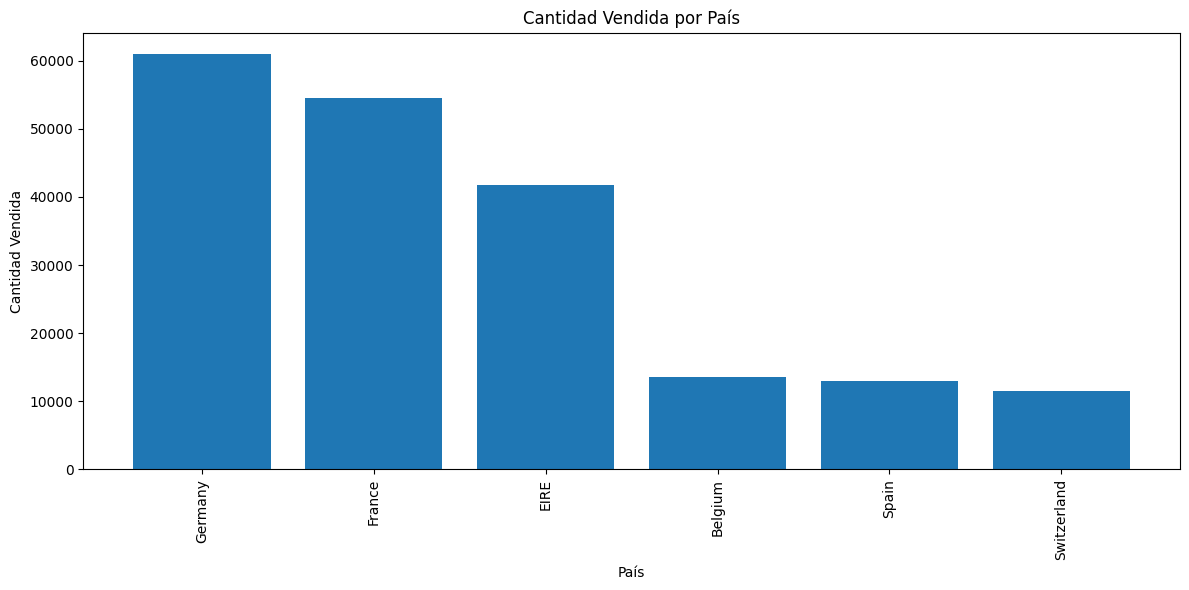

In [48]:
df_paises_segundogrupo= df_paises_segundogrupo.sort_values(by='TotalQuantitySold', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_paises_segundogrupo['Country'], df_paises_segundogrupo['TotalQuantitySold'])
plt.xlabel('País')
plt.ylabel('Cantidad Vendida')
plt.title('Cantidad Vendida por País')
plt.xticks(rotation=90)  
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout() 
plt.show()

Por otra parte podemos emplear el calculo de los ingresos por ventas separados para cada país, usando la formula Income = UnitPrice*Quantity para estudiar en terminos monetarios los ingresos que se generan por ventas para cada pais.

In [49]:
df['Income']=df['Quantity']*df['UnitPrice']
Ingresos_por_pais = df.dropna().groupby('Country')['Income'].sum()


In [50]:
Ingresos_por_pais.sort_values(ascending=False)

Country
United Kingdom          3430047.914
Germany                  127130.250
France                   108190.110
EIRE                      97016.520
Spain                     27292.310
Belgium                   26902.780
Switzerland               26483.600
Portugal                  18966.970
Norway                    15474.880
Netherlands               12652.920
Italy                     12050.630
Channel Islands           11465.730
Australia                 10816.420
Finland                    9771.760
Cyprus                     7417.260
Austria                    5910.390
Denmark                    5291.550
Poland                     4730.680
Singapore                  4516.080
Sweden                     4152.050
Greece                     3184.350
Iceland                    2866.770
Israel                     2677.760
USA                        2181.870
Unspecified                1742.440
Canada                     1738.600
Malta                      1400.250
Lebanon             

Observamos que en terminos monetarios, el principal pais generador de ingresos para la empres retail es  Reino Unido a donde se generaron ingresos monetarios por  US $ 3.430.047 

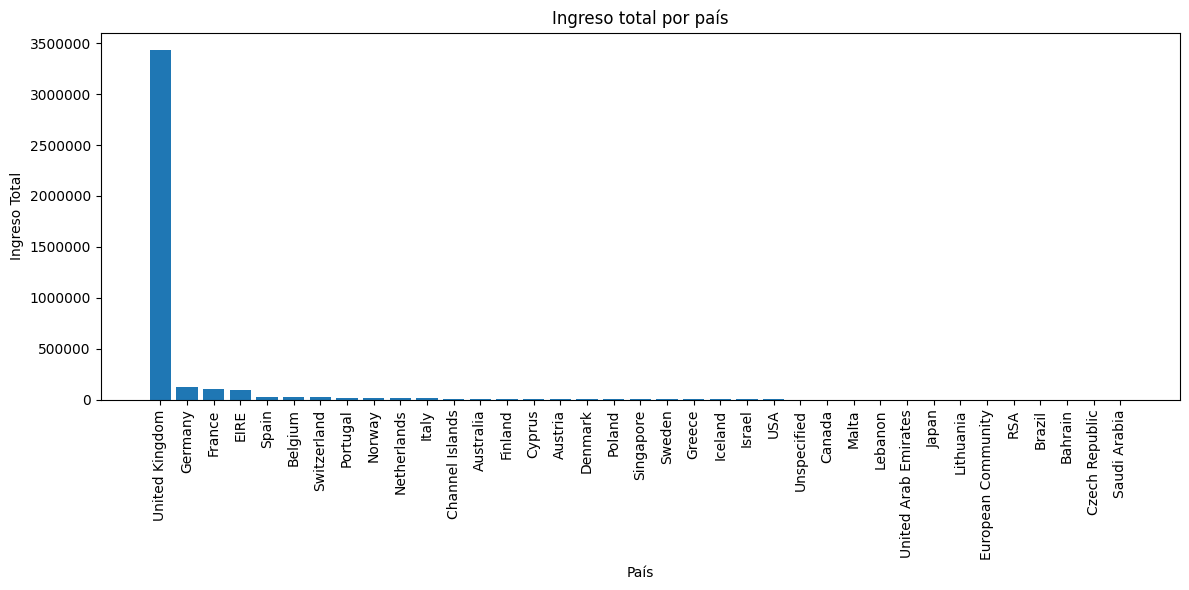

In [51]:
df_ingresos_por_pais = Ingresos_por_pais.reset_index()

df_ingresos_por_pais.columns = ['Country', 'TotalIncome']

df_ingresos_por_pais =df_ingresos_por_pais.sort_values(by='TotalIncome', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_ingresos_por_pais['Country'],df_ingresos_por_pais['TotalIncome'])
plt.xlabel('País')
plt.ylabel('Ingreso Total')
plt.title('Ingreso total por país')
plt.xticks(rotation=90)  
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout() 
plt.show()


In [52]:
df_ingresos_por_pais

,Country,TotalIncome
35,United Kingdom,3430047.914
14,Germany,127130.250
13,France,108190.110
10,EIRE,97016.520
30,Spain,27292.310
3,Belgium,26902.780
32,Switzerland,26483.600
26,Portugal,18966.970
24,Norway,15474.880
23,Netherlands,12652.920


Seguiremos un procedimiento analogo separando los paises en 3 grupos de ingresos totales:

Primer grupo: total de ingresos mayores a 130.000 (unicamente reuno unido)

Segundo grupo : total de ingresos entre 10.000 y 130.000

Tercer grupo : total de ingresos entre 1000 y 10.000

4to grupo : Total de ingresos de menos de 1000.

In [53]:
df_ingresos_por_pais_g1 = df_ingresos_por_pais[(df_ingresos_por_pais['TotalIncome'] >= 0) & (df_ingresos_por_pais['TotalIncome'] <= 1000)]
df_ingresos_por_pais_g2 = df_ingresos_por_pais[(df_ingresos_por_pais['TotalIncome'] >= 1000) & (df_ingresos_por_pais['TotalIncome'] <= 10000)]
df_ingresos_por_pais_g3 = df_ingresos_por_pais[(df_ingresos_por_pais['TotalIncome'] >= 10000) & (df_ingresos_por_pais['TotalIncome'] <= 130000)]
df_ingresos_por_pais_g4 = df_ingresos_por_pais[(df_ingresos_por_pais['TotalIncome'] >= 130000)]


In [54]:
df_ingresos_por_pais_g1

,Country,TotalIncome
11,European Community,936.95
27,RSA,817.86
4,Brazil,523.44
2,Bahrain,218.30
8,Czech Republic,210.30
28,Saudi Arabia,145.92


In [55]:
df_ingresos_por_pais_g2

,Country,TotalIncome
12,Finland,9771.76
7,Cyprus,7417.26
1,Austria,5910.39
9,Denmark,5291.55
25,Poland,4730.68
29,Singapore,4516.08
31,Sweden,4152.05
15,Greece,3184.35
16,Iceland,2866.77
17,Israel,2677.76


In [56]:
df_ingresos_por_pais_g3

,Country,TotalIncome
14,Germany,127130.25
13,France,108190.11
10,EIRE,97016.52
30,Spain,27292.31
3,Belgium,26902.78
32,Switzerland,26483.60
26,Portugal,18966.97
24,Norway,15474.88
23,Netherlands,12652.92
18,Italy,12050.63


In [57]:
df_ingresos_por_pais_g4

,Country,TotalIncome
35,United Kingdom,3430047.914


Graficando los ingresos generados separados en los distintos grupos de interés

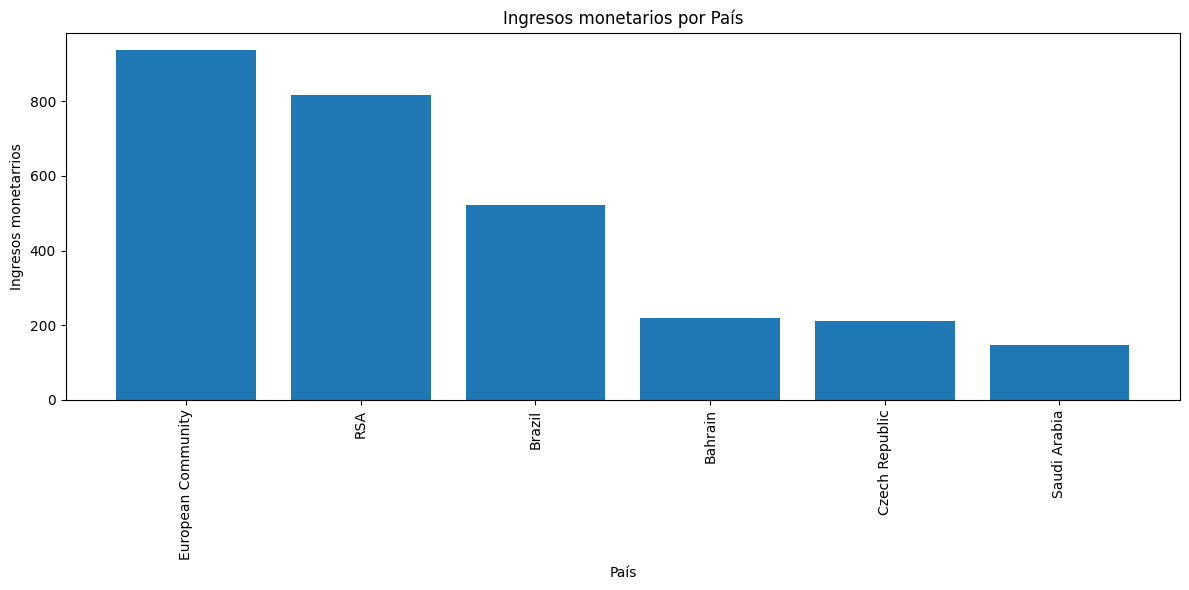

In [58]:
df_ingresos_por_pais_g1= df_ingresos_por_pais_g1.sort_values(by='TotalIncome', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_ingresos_por_pais_g1['Country'], df_ingresos_por_pais_g1['TotalIncome'])
plt.xlabel('País')
plt.ylabel('Ingresos monetarrios')
plt.title('Ingresos monetarios por País')
plt.xticks(rotation=90)  
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout() 
plt.show()

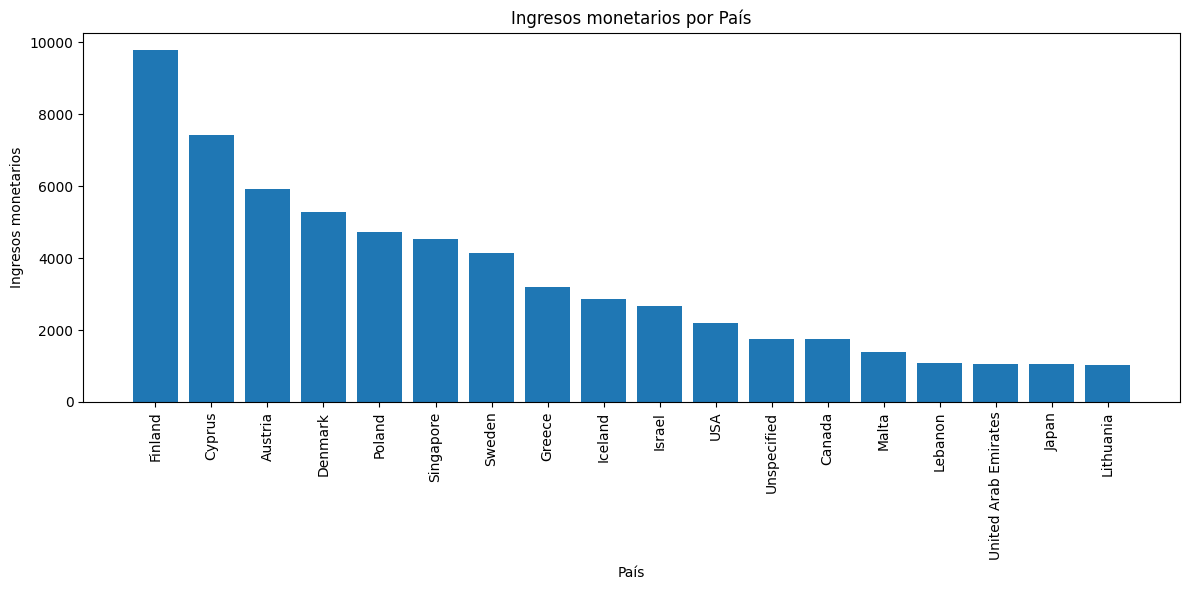

In [59]:
df_ingresos_por_pais_g2= df_ingresos_por_pais_g2.sort_values(by='TotalIncome', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_ingresos_por_pais_g2['Country'], df_ingresos_por_pais_g2['TotalIncome'])
plt.xlabel('País')
plt.ylabel('Ingresos monetarios')
plt.title('Ingresos monetarios por País')
plt.xticks(rotation=90)  
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout() 
plt.show()

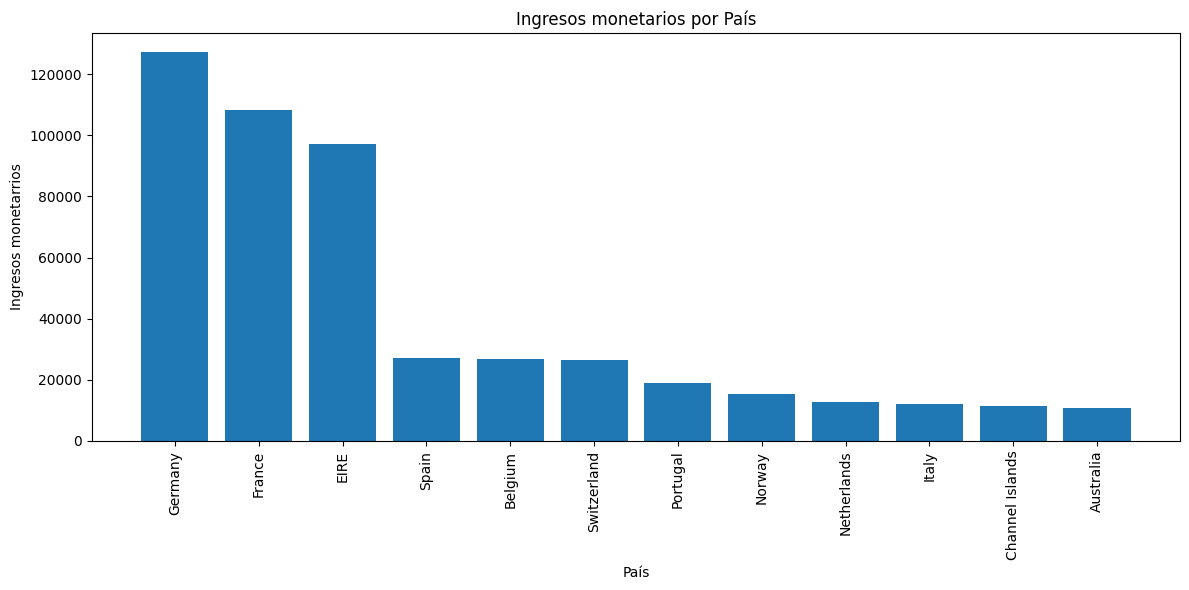

In [60]:
df_ingresos_por_pais_g3= df_ingresos_por_pais_g3.sort_values(by='TotalIncome', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_ingresos_por_pais_g3['Country'], df_ingresos_por_pais_g3['TotalIncome'])
plt.xlabel('País')
plt.ylabel('Ingresos monetarrios')
plt.title('Ingresos monetarios por País')
plt.xticks(rotation=90)  
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout() 
plt.show()

Conocemos el id de 4170 cientes distintos en la base de datos, y de los 442.666 registros desconocemos el id de cliente en 116.226 casos que agruparian a los demas clientes, esta informacion la podemos usar para destacar a los clientes cuyo id conocemos que mas compras hacen y mas ingresos le generan a la empresa, para generar un ranking de clientes y aplicar estrategias de marketing enfocadas a estos.

Obtenemos un data set con los 20 o (n) clientes que mas ingresos le generan a la empresa por concepto de sus compras, segun la cantidad que la empresa requiera de cliente top.


In [61]:
#Calculando el ranking de los 20 clientes que mas ingresos le generan a la empresa. La columna total income muestra el total
#de ingresos que cada uno de los clientes genera por concepto de sus compras.

income_por_customer = df.groupby('CustomerID')['Income'].sum()

df_income_por_customer = income_por_customer.reset_index()

df_income_por_customer.columns = ['CustomerID', 'TotalIncome']

df_income_por_customer.sort_values(by='TotalIncome',ascending=False).head(20)

,CustomerID,TotalIncome
1817,14911.0,78186.73
1244,14096.0,38290.66
3865,17841.0,32125.19
539,13089.0,27538.69
321,12748.0,19786.62
1240,14088.0,17388.08
1285,14156.0,16476.75
1900,15039.0,15044.22
2100,15311.0,14989.92
3752,17675.0,13845.97


In [62]:
df['CustomerID'].isnull().sum()

116226

A continuacion vamos a ver cuales son los productos que mas volumen de ventas generan y mas ingresos generan a la empresa usando la columna , obtenemos un dataset con el top 20 (n) de productos que se venden en mayor cantidad.

Calculando el top de productos que la empresa retail vende en mayores cantidades en terminos de unidades vendidas.

In [63]:

quantity_por_producto = df.groupby('Description')['Quantity'].sum()

df_quantity_por_producto = quantity_por_producto.reset_index()

df_quantity_por_producto.columns = ['Product description', 'Quantity']

df_quantity_por_producto.sort_values(by='Quantity',ascending=False).head(20)

,Product description,Quantity
1706,JUMBO BAG RED RETROSPOT,14046
205,ASSORTED COLOUR BIRD ORNAMENT,11054
3627,WHITE HANGING HEART T-LIGHT HOLDER,10927
1872,LUNCH BAG RED RETROSPOT,10519
1864,LUNCH BAG BLACK SKULL.,8208
1867,LUNCH BAG CARS BLUE,7928
1672,JAM MAKING SET PRINTED,7658
1704,JUMBO BAG PINK POLKADOT,7453
1866,LUNCH BAG APPLE DESIGN,7433
1874,LUNCH BAG SPACEBOY DESIGN,7302


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442666 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    442666 non-null  object        
 1   StockCode    442666 non-null  object        
 2   Description  442666 non-null  object        
 3   Quantity     442666 non-null  int64         
 4   InvoiceDate  442666 non-null  datetime64[ns]
 5   UnitPrice    442666 non-null  float64       
 6   CustomerID   326440 non-null  float64       
 7   Country      442666 non-null  object        
 8   Income       442666 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 33.8+ MB


A continuación mostramos un top de los productos que mayores ingresos generan (UnitPrice * Quantity) a la empresa

In [65]:

Income_por_producto = df.groupby('Description')['Income'].sum()

df_Income_por_producto = Income_por_producto.reset_index()

df_Income_por_producto.columns = ['Product description', 'Income']

df_Income_por_producto.sort_values(by='Income',ascending=False).head(20)

,Product description,Income
2259,PARTY BUNTING,34408.38
3627,WHITE HANGING HEART T-LIGHT HOLDER,34124.37
1706,JUMBO BAG RED RETROSPOT,32286.86
1673,JAM MAKING SET WITH JARS,24058.05
3270,SPOTTY BUNTING,22691.35
966,DOORMAT KEEP CALM AND COME IN,20974.66
2054,NATURAL SLATE HEART CHALKBOARD,20266.76
2229,PAPER CHAIN KIT 50'S CHRISTMAS,20260.61
1872,LUNCH BAG RED RETROSPOT,19783.88
205,ASSORTED COLOUR BIRD ORNAMENT,19262.22


In [66]:

df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

income_por_mes_y_anio = df.groupby(['Year', 'Month'])['Income'].sum()

df_income_por_mes_y_anio = income_por_mes_y_anio.reset_index()

df_income_por_mes_y_anio = df_income_por_mes_y_anio.sort_values(by='Year')

print(df_income_por_mes_y_anio)

    Year  Month      Income
0   2010     12  370264.710
1   2011      1  297346.040
2   2011      2  252622.440
3   2011      3  326408.830
4   2011      4  260773.341
5   2011      5  364380.530
6   2011      6  328488.700
7   2011      7  332629.681
8   2011      8  336917.000
9   2011      9  488212.942
10  2011     10  552652.730
11  2011     11  719349.770
12  2011     12  218353.110


Podemos observar que para el año 2010 solo tenemos datos del mes de diciembre y el resto de datos son para los meses de enero a diciembre de 2011. Esto nos permite graficar el ingreso total generado por meses y observar que el mes donde se generaron mayores ingresos fue en noviembre de 2011, mes en el que se generarn ingresos por  us $719.349,770

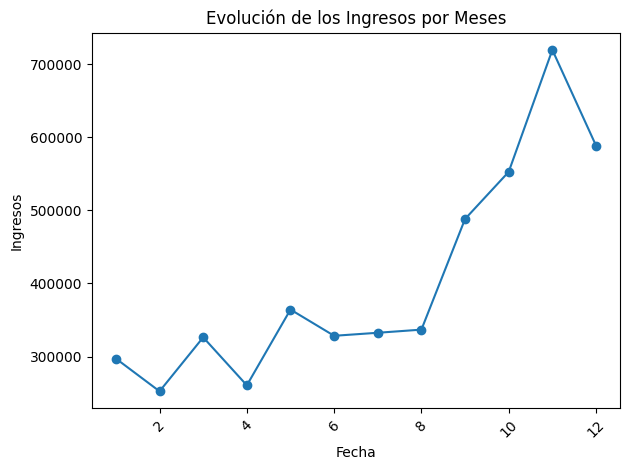

In [67]:

income_por_mes_y_anio = df.groupby(['Month'])['Income'].sum()

df_income_por_mes_y_anio = income_por_mes_y_anio.reset_index()

df_income_por_mes_y_anio = df_income_por_mes_y_anio.sort_values(by=['Month'])

plt.plot(figsize=(10, 13))
plt.plot(df_income_por_mes_y_anio['Month'], df_income_por_mes_y_anio['Income'], marker='o')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.title('Evolución de los Ingresos por Meses')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()


Evolución de los ingresos por días

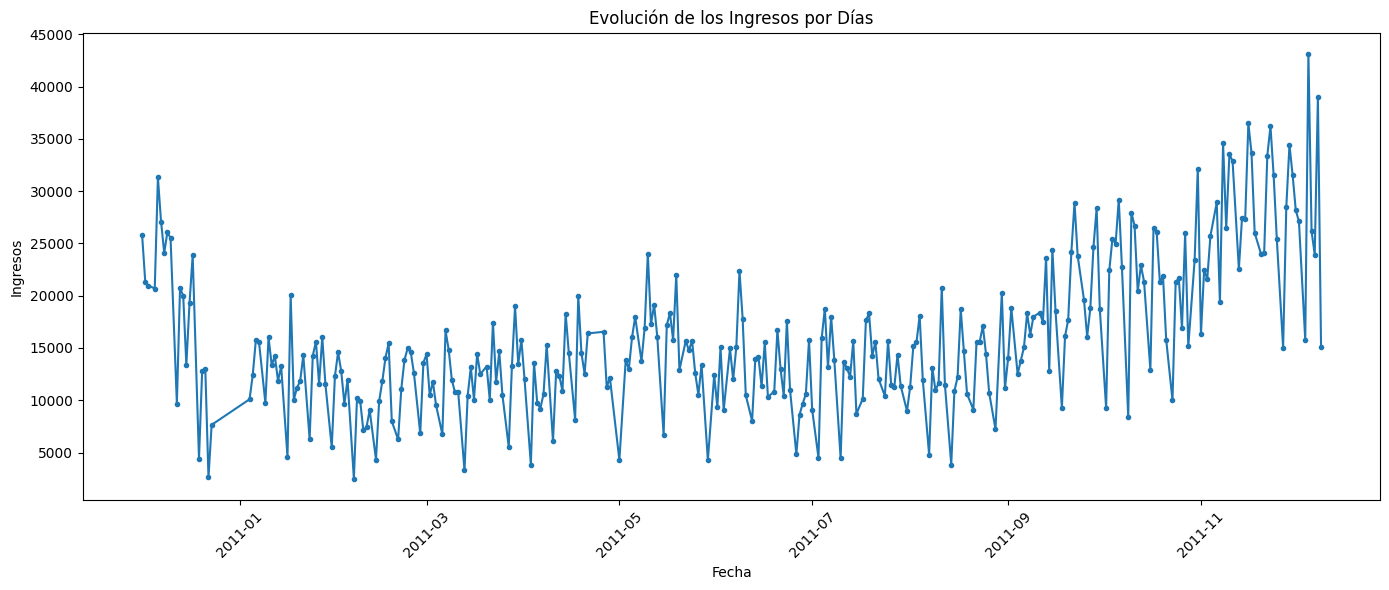

In [68]:
income_por_dia = df.groupby(df['InvoiceDate'].dt.date)['Income'].sum()

df_income_por_dia = income_por_dia.reset_index()

plt.figure(figsize=(14, 6))
plt.plot(df_income_por_dia['InvoiceDate'], df_income_por_dia['Income'], marker='.')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.title('Evolución de los Ingresos por Días')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()








**Conclusiones**

1.Algunas de las modificaciones que fue necesario hacer al dataset fueron:
* Se cambio el separador decimal de la columna unitprice el cual estaba separando los valores con comas para trabajar con puntos y facilitar la transformacion a CSV del dataset.
* Transformar la columna InvoiceDate a tipo datetime
* Fue necesario filtrar el dataset para eliminar valores extraños contenidos en las columnas quantity y unitprice ya que contenian valores negativos y ademas tambien contenian valores atipicos.

2. Algunos insights interesantes sobre el dataset : 
* La mayoria de las ventas son efectuadas a clientes en el Reino Unido. En total fueron 495478 al reino unido representando el 92% de las ventas.

* Podemos segmentar el data set en grupos para observar el comportamiento de las ventas en los paises diferentes al reino unido

* Observamos que sin contar al reuno unido, los paises que generan mayores ingresos son Alemania, Francia, Irlanda y españa.

* Ademas pudimmos obtener el top de clientes que mas ingresos generan y el top de productos que mas se venden y mas ingresos generan.

* Podemos observar que el mes en donde mas ingresos se generaron fue en noviembre de 2011 por un total de us $719.349,770

* Tambien pudimos obtener una grafica de la evolucion de los ingresos por días.
